<a href="https://colab.research.google.com/github/starrycarina/GW/blob/main/Difference_in_Means_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/BASC0005/SMI2017.xlsx'
KS4 = pd.read_excel(file_path, sheet_name='KS4', engine='openpyxl')
KS5 = pd.read_excel(file_path, sheet_name='KS5', engine='openpyxl')

file_path2 = '/content/drive/MyDrive/BASC0005/BES-2015-General-Election-results-file-v2.21.xlsx'
Election = pd.read_excel(file_path2, sheet_name='Data', engine='openpyxl')

Mounted at /content/drive


In [3]:
KS4 = KS4.iloc[7:, 1:]  # Select rows from index 8 onwards and columns from index 1 onwards
KS4.columns = KS4.iloc[0]  # Set the first row as column names
KS4 = KS4.iloc[1:]  # Remove the first row (which was used for column names)
KS4.reset_index(drop=True, inplace=True) # Reset the index


KS4.rename(columns={KS4.columns[0]: 'Code'}, inplace=True)
KS4.rename(columns={KS4.columns[1]: 'Local Authority'}, inplace=True) # For consistency
KS4.rename(columns={KS4.columns[4]: 'Other pupils'}, inplace=True)


KS4.head()

7,Code,Local Authority,Region,Average attainment 8 score per pupil,Other pupils
0,E06000001,Hartlepool,North East,47.4,49.7
1,E06000002,Middlesbrough,North East,47.5,50.7
2,E06000003,Redcar and Cleveland,North East,46.9,49.3
3,E06000004,Stockton-on-Tees,North East,49.9,52.6
4,E06000005,Darlington,North East,48.1,50.4


In [4]:
import numpy as np


KS5 = KS5.iloc[7:, 2:]
KS5.columns = KS5.iloc[0]
KS5 = KS5.iloc[1:]
KS5.reset_index(drop=True, inplace=True)


# Rename the columns
KS5.rename(columns={KS5.columns[0]: 'Code', KS5.columns[1]: 'Local Authority'}, inplace=True)


# Select the first 5 columns
KS5 = KS5.iloc[:, :5]


# Replace empty strings and whitespace-only strings with NaN
KS5['All students'] = KS5['All students'].replace(r'^\s*$', np.nan, regex=True)


# Now use dropna to remove rows where 'Code' is NaN
KS5.dropna(subset=['All students'], inplace=True)


KS5.head()

<ipython-input-4-e02f48b050d0>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  KS5['All students'] = KS5['All students'].replace(r'^\s*$', np.nan, regex=True)


7,Code,Local Authority,Pupils known to be eligible for free school meals,All other pupils,All students
4,E06000004,Stockton-on-Tees UA,28.194163,31.305819,31.006186
5,E06000001,Hartlepool UA,26.470279,29.227511,28.828859
6,E06000002,Middlesbrough UA,29.044048,31.390228,30.890344
7,E06000005,Darlington UA,28.964303,31.226454,31.016062
8,E06000047,County Durham UA,30.770997,32.763604,32.562053


In [5]:
# Merge KS4 and KS5 based on 'Code' and 'Local Authority'
SMI = pd.merge(KS4, KS5, on=['Code', 'Local Authority'], how='inner')


# Display the head of the new DataFrame
SMI.head()

7,Code,Local Authority,Region,Average attainment 8 score per pupil,Other pupils,Pupils known to be eligible for free school meals,All other pupils,All students
0,E07000004,Aylesbury Vale,South East,51.6,52.6,26.077405,33.083453,32.913008
1,E07000005,Chiltern,South East,60.4,61.2,27.173913,36.69376,36.555385
2,E07000006,South Bucks,South East,57.1,57.9,27.685393,34.393337,34.215227
3,E07000007,Wycombe,South East,53.3,54.5,28.869492,34.56358,34.345185
4,E07000008,Cambridge,East,53.3,54.7,28.252427,33.922387,33.699320


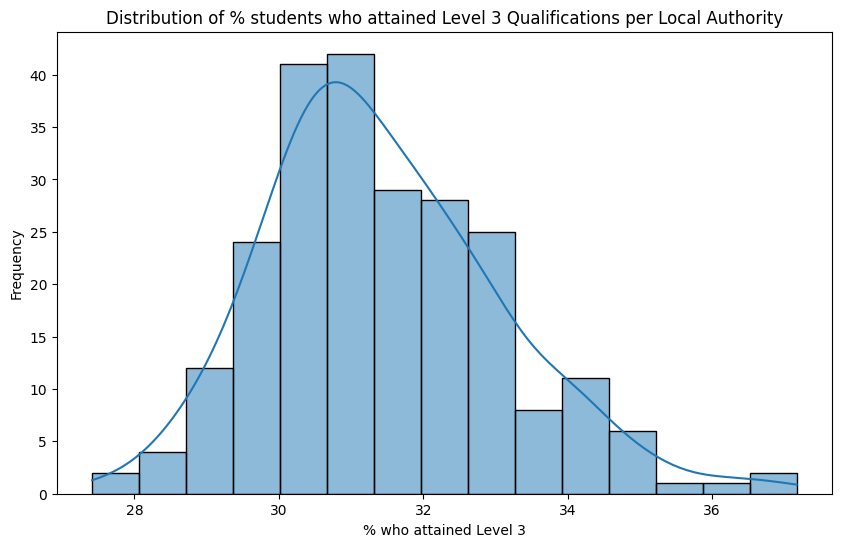

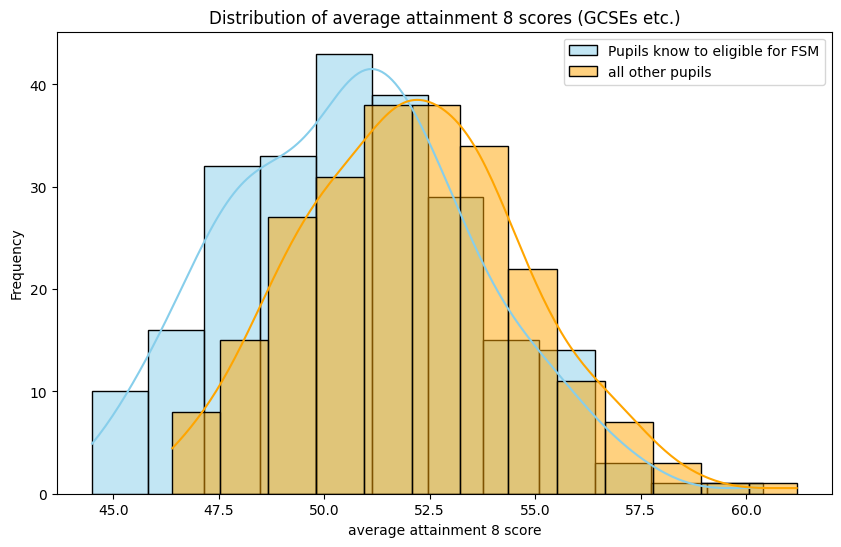

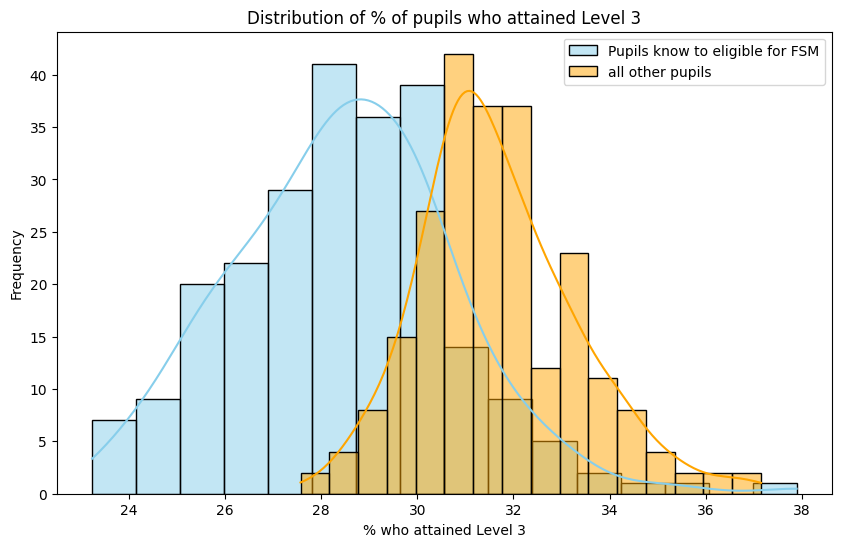

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



# Distribution for 'All Students'
plt.figure(figsize=(10, 6))
sns.histplot(SMI['All students'], kde=True)
plt.title('Distribution of % students who attained Level 3 Qualifications per Local Authority')
plt.xlabel('% who attained Level 3')
plt.ylabel('Frequency')
plt.show()

# Distribution for FSM and non-FSM
plt.figure(figsize=(10, 6))
sns.histplot(SMI['Average attainment 8 score per pupil'], kde=True, label='Pupils know to eligible for FSM', color='skyblue')
sns.histplot(SMI['Other pupils'], kde=True, label='all other pupils', color='orange')
plt.title('Distribution of average attainment 8 scores (GCSEs etc.)')
plt.xlabel('average attainment 8 score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Distribution for FSM and non-FSM
plt.figure(figsize=(10, 6))
sns.histplot(SMI['Pupils known to be eligible for free school meals'], kde=True, label='Pupils know to eligible for FSM', color='skyblue')
sns.histplot(SMI['All other pupils'], kde=True, label='all other pupils', color='orange')
plt.title('Distribution of % of pupils who attained Level 3')
plt.xlabel('% who attained Level 3')
plt.ylabel('Frequency')
plt.legend()
plt.show()

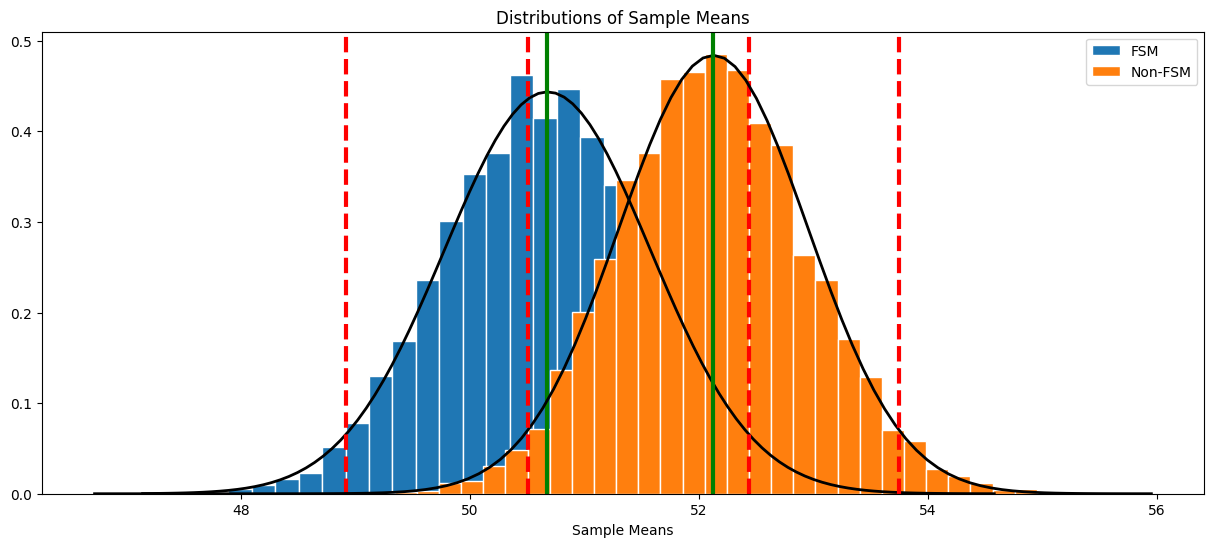

Absolute Difference in Population Means: 1
95% Confidence Interval: (-0.942, 3.841)
The difference in means between % of students who attained Level 3 Qualifications eligible for free school meals vs those who aren't by Local Authority is not statistically significant (could be due to random chance).


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t  # Import norm for fitting normal distribution

def two_hist(groups, group_labs, xlab, title):
    plt.figure(figsize=(15, 6))
    group_means = []
    group_ses = []

    for it, var in enumerate(groups):  # Use enumerate for automatic indexing
        sample_size = 10
        sample_means = []
        iterations = 10000

        for _ in range(iterations):  # Use _ for unused loop variable
            sample = var.sample(sample_size, replace=True)
            sample_mean = sample.mean()
            sample_means.append(sample_mean)

        plt.hist(sample_means, bins=int(iterations/300), edgecolor='white', density=True, label=group_labs[it])
        mu, se = norm.fit(sample_means)  # Fit normal distribution
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, se)  # Calculate PDF

        mean = var.mean()
        lower_ci = mu - se * 1.96
        upper_ci = mu + se * 1.96

        plt.plot(x, p, 'k', linewidth=2)  # Plot normal distribution
        plt.xlabel(xlab)
        plt.title(title)
        plt.axvline(mean, color='green', linestyle='solid', linewidth=3)
        plt.axvline(lower_ci, color='red', linestyle='dashed', linewidth=3)  # Assuming you want to plot lower_ci
        plt.axvline(upper_ci, color='red', linestyle='dashed', linewidth=3)  # Assuming you want to plot upper_ci

        group_means.append(np.mean(sample_means))
        group_ses.append(se)

    plt.legend()
    plt.show()

    # Calculate and return the absolute difference in population means
    diff_in_means = abs(group_means[0] - group_means[1])
    # Calculate 95% confidence interval for the difference
    pooled_se = np.sqrt(group_ses[0]**2 + group_ses[1]**2)
    ci_lower = diff_in_means - t.ppf(0.975, iterations - 1) * pooled_se  # Using t-distribution
    ci_upper = diff_in_means + t.ppf(0.975, iterations - 1) * pooled_se

    print(f"Absolute Difference in Population Means: {int(round(diff_in_means))}")
    print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

    # Interpretation
    if ci_lower > 0:
        print("The difference in means between % of students who attained Level 3 Qualifications eligible for free school meals vs those who aren't by Local Authority is statistically significant (unlikely due to random chance).")
    else:
        print("The difference in means between % of students who attained Level 3 Qualifications eligible for free school meals vs those who aren't by Local Authority is not statistically significant (could be due to random chance).")

    return int(round(diff_in_means))

fsm_data = SMI['Average attainment 8 score per pupil'].astype(float)
non_fsm_data = SMI['Other pupils'].astype(float)

difference = two_hist([fsm_data, non_fsm_data], ['FSM', 'Non-FSM'], 'Sample Means', 'Distributions of Sample Means')

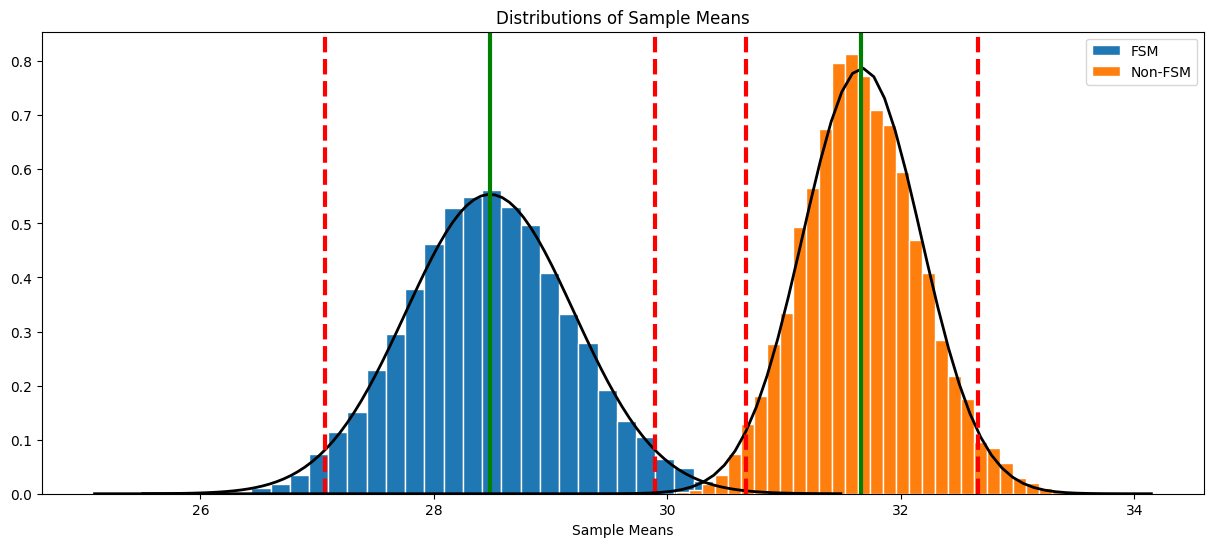

Absolute Difference in Population Means: 3
95% Confidence Interval: (1.460, 4.913)
The difference in means between % of students who attained Level 3 Qualifications eligible for free school meals vs those who aren't by Local Authority is statistically significant (unlikely due to random chance).


In [8]:
fsm_data = SMI['Pupils known to be eligible for free school meals'].astype(float)
non_fsm_data = SMI['All other pupils'].astype(float)

difference = two_hist([fsm_data, non_fsm_data], ['FSM', 'Non-FSM'], 'Sample Means', 'Distributions of Sample Means')

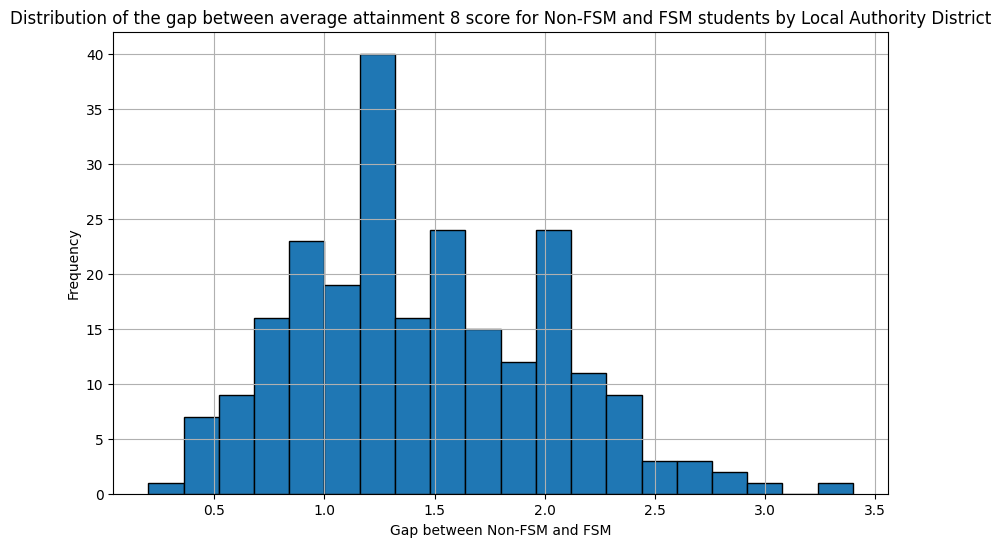

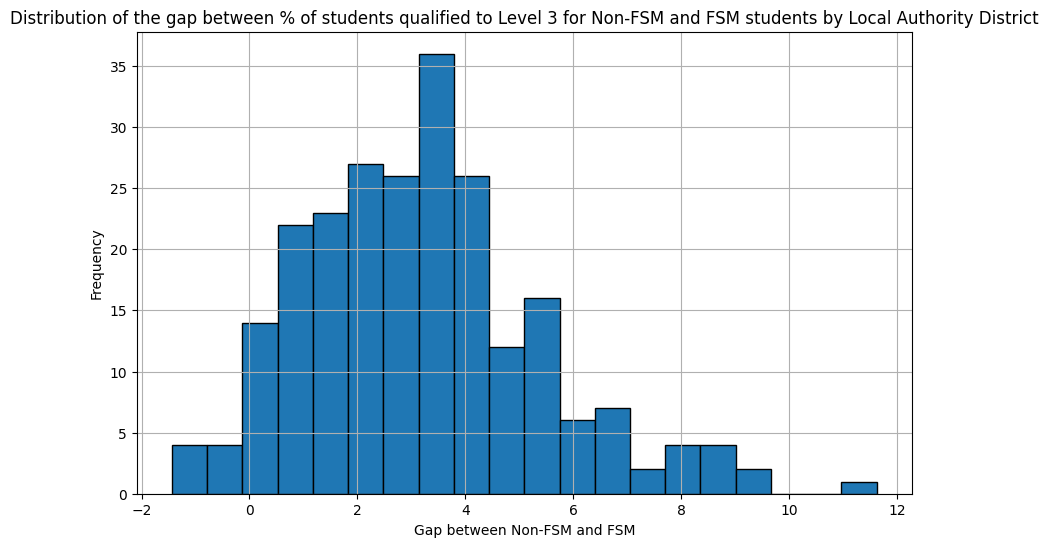

In [ ]:
# Calculate the gap between FSM and non-FSM
SMI['KS4Gap'] = SMI['Other pupils'] - SMI['Average attainment 8 score per pupil']
SMI['KS5Gap'] = SMI['All other pupils'] - SMI['Pupils known to be eligible for free school meals']

# Plotting the distribution of the gaps
plt.figure(figsize=(10, 6))
plt.hist(SMI['KS4Gap'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Gap between Non-FSM and FSM')
plt.ylabel('Frequency')
plt.title('Distribution of the gap between average attainment 8 score for Non-FSM and FSM students by Local Authority District')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(SMI['KS5Gap'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Gap between Non-FSM and FSM')
plt.ylabel('Frequency')
plt.title('Distribution of the gap between % of students qualified to Level 3 for Non-FSM and FSM students by Local Authority District')
plt.grid(True)
plt.show()

